## Q-1 (10%)
According to the following AND, OR, NOT symbols used in logical computations of electrical brain, can you express A ⊕ (￢B), Try to have at least two different ways to realize this operation results.

##Ans

### 1. A ⊕ (￢B) = (￢A ∨ B) ∧ (A ∨ B)

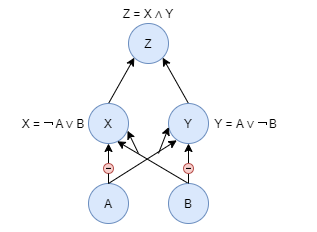

In [ ]:
from IPython.display import Image, display
display(Image('/content/drive/My Drive/ISA & TA/DATA 255/My Notebooks/HW_1/Q_1(1).png'))

### 2. A ⊕ (￢B) = (A ∧ B) ∨ (￢A ∧ ￢B) 

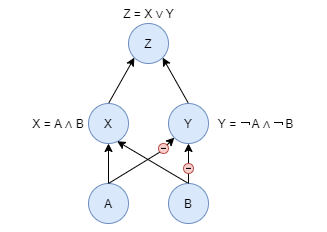

In [ ]:
display(Image('/content/drive/My Drive/ISA & TA/DATA 255/My Notebooks/HW_1/Q_2(2).png'))

## Q-2 (10%)
Try to prepare a historical review (at least 500 words) about the technical improvements from electronic brain to deep learning

## Ans.

Reference: [Biological Neuron](https://www.umsl.edu/~piccininig/First_Computational_Theory_of_Mind_and_Brain.pdf), [Neural Network](https://www.ecse.rpi.edu/~nagy/PDF_chrono/1991_Nagy_NN1991-ThenAndNow.pdf), [Back  Propogation](https://www.sciencedirect.com/science/article/pii/B9780127412528500108)


Warren S. McCulloch and Walter H. Pitt’s 1943 paper, "A Logical Calculus of the Ideas Immanent in Nervous Activity," is often cited as the starting point in neural network research. Despite its significance in neuroscience and computation, the paper has received little historical and philosophical attention. In 1943 there already existed a lively community of biophysicists doing mathematical work on neural networks.

McCulloch and Pitts have often credited with the first (1943) mechanistic interpretation of the neuron doctrine. It was not until the 1960s, however, that neural networks emerged as a significant sub-discipline with attempts at application to engineering problems. Frank Rosenblatt, a Cornell University psychologist, showed by mathematical analysis, digital computer simulation, and experiments with special-purpose parallel analog systems that neural networks with variable weight connections could be trained to classify spatial patterns into prespecified categories. In his attempts to provide biologically plausible explanations of the function of the central nervous system, he investigated both relatively simple networks that were amenable to analysis and more complex networks whose behavior could be predicted only in terms of gross characteristics. He built up a sizable group of theoreticians, experimentalists, technologists, and, later, biologists. His work caught the imagination of the press and led to a wave of febrile activity that subsided at the end of that decade.

Modeled loosely on the human brain, a neural net consists of thousands or even millions of simple processing nodes that are densely interconnected. Most of today’s neural nets are organized into layers of nodes, and they're "feed-forward," meaning that data moves through them in only one direction. An individual node might be connected to several nodes in the layer beneath it, from which it receives data, and several nodes in the layer above it, to which it sends data. To each of its incoming connections, a node will assign a number known as a "weight." When the network is active, the node receives a different data item — a different number — over each of its connections and multiplies it by the associated weight. It then adds the resulting products together, yielding a single number.

A neural network is a parallel, distributed information processing structure consisting of processing elements interconnected together with unidirectional signal channels called connections. Each processing element has a single output connection that branches into as many collateral connections as desired. The processing element output signal can be of any mathematical type desired. All of the processing that goes on within each processing element must be completely local. One of the crucial decisions in the design of the backpropagation architecture is the selection of a sigmoidal activation function although it is now known that other activation functions can be used. Historically, sigmoidal activation functions have been used by several investigators.

We experimentally quantify the generality versus specificity of neurons in each layer of a deep convolutional neural network and report a few surprising results. Transferability is negatively affected by two distinct issues: (1) the specialization of higher layer neurons to their original task at the expense of performance on the target task, which was expected, and (2) optimization difficulties related to splitting networks between co-adapted neurons, which was not expected.

##Q-3 (15%) 
Suppose you have an MLP composed of one input layer with 20 passthrough neurons, followed by one hidden layer with 100 artificial neurons, and finally one output layer with 3 artificial neurons. All artificial neurons use the ReLU activation function.



* What is the shape of the input matrix X?
* What are the shapes of the hidden layer’s weight vector Wh and its bias vector bh?
* What are the shapes of the output layer’s weight vector Wo and its bias vector bo?
* What is the shape of the network’s output matrix Y?
* Write the equation that computes the network’s output matrix Y as a function of X, Wh, bh, Wo, and bo


##Ans

* ### Shape of Input Matrix 
    * X = m x 20, where m = Training Batch Size 
* ### Shape of Hidden Layer's Weight Vector and Bias Vector 
    * Wh = 20 x 100
    * bh = 1 x 100
* ### Shape of Output Layer's Weight Vector
    * Wo = 100 x 3
    * bo = 1 x 3
* ### Shape of Network's Output
    * Y = m x 3, where m = Training Batch Size
* ### Network's Output 
    * Y = ReLU(ReLU(X * Wh + bh) * Wo + bo)




## Q-4 (20%, coding assignment)
Train a deep MLP on the MNIST dataset (you can load it using keras.datasets.mnist.load_data(). See if you can get over 98.5% precision. Try tuning parameters, layers, neurons, activation functions, learning rate, etc. Find your best tuned model and plot learning curves, as we show at our coding demo during class. 

In [ ]:
!pip install keras-metrics

In [ ]:
# save the final model to file
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import load_model
from keras.models import Sequential
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.layers.core import Dense, Activation, Dropout
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import keras
import keras_metrics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# load train and test dataset
def load_dataset():
	# load dataset
	(trainX, trainY), (testX, testY) = mnist.load_data()
	# one hot encode target values
	trainY = to_categorical(trainY,10)
	testY = to_categorical(testY,10)
	return trainX, trainY, testX, testY

# scale pixels
def prep_pixels(train, test):
	# convert from integers to floats
	train_norm = train.astype('float32')
	test_norm = test.astype('float32')
	# normalize to range 0-1
	train_norm = train_norm / 255.0
	test_norm = test_norm / 255.0
	# return normalized images
	return train_norm, test_norm

# define mlp model
def define_model():
	model = Sequential()
	model.add(Flatten(input_shape= [28,28]))
	model.add(Dense(1000, activation="relu"))
	model.add(Dropout(0.2))
	model.add(Dense(512, activation="relu"))
	model.add(Dropout(0.2))
	model.add(Dense(10, activation="softmax"))
	# compile model
	opt = SGD(lr=0.01, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=[keras.metrics.Precision()])
	return model

# run the test harness for evaluating a model
def run_test_harness():
	# load dataset
	trainX, trainY, testX, testY = load_dataset()
	# prepare pixel data
	trainX, testX = prep_pixels(trainX, testX)
	# define model
	model = define_model()
	# fit model
	history = model.fit(trainX, trainY, epochs=10, batch_size=32, verbose=0)
	# save model
	model.save('final_model.h5')
	return history

# entry point, run the test harness
a = run_test_harness()

In [ ]:
# load train and test dataset
def load_dataset():
	# load dataset
	(trainX, trainY), (testX, testY) = mnist.load_data()
	# one hot encode target values
	trainY = to_categorical(trainY,10)
	testY = to_categorical(testY)
	return trainX, trainY, testX, testY

# scale pixels
def prep_pixels(train, test):
	# convert from integers to floats
	train_norm = train.astype('float32')
	test_norm = test.astype('float32')
	# normalize to range 0-1
	train_norm = train_norm / 255.0
	test_norm = test_norm / 255.0
	# return normalized images
	return train_norm, test_norm

In [ ]:
# load dataset
trainX, trainY, testX, testY = load_dataset()
# prepare pixel data
trainX, testX = prep_pixels(trainX, testX)
# load model
model = load_model('final_model.h5')
# evaluate model on test dataset
_, train = model.evaluate(trainX, trainY, verbose=0)
print('Precision of training data > %.3f' % (train * 100.0))
_, test = model.evaluate(testX, testY, verbose=0)
print('Precision of testing data > %.3f' % (test * 100.0))

Precision of training data > 99.823
Precision of testing data > 98.487


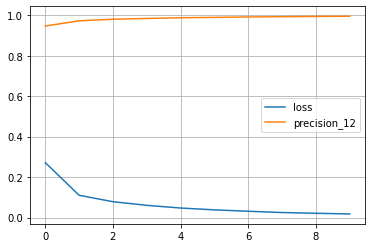

In [ ]:
pd.DataFrame(a.history).plot()
plt.grid(True)
plt.show()

In [ ]:


rounded_predictions = model.predict_classes(testX, batch_size=70, verbose=0)
rounded_labels=np.argmax(testY, axis=1)
print(classification_report(rounded_labels, rounded_predictions, digits=3))
acc_fc2 = accuracy_score(rounded_labels, rounded_predictions)
print("Accuracy is:", acc_fc2)

              precision    recall  f1-score   support

           0      0.986     0.992     0.989       980
           1      0.993     0.995     0.994      1135
           2      0.985     0.986     0.985      1032
           3      0.977     0.985     0.981      1010
           4      0.990     0.966     0.978       982
           5      0.989     0.981     0.985       892
           6      0.987     0.989     0.988       958
           7      0.986     0.974     0.980      1028
           8      0.978     0.984     0.981       974
           9      0.962     0.979     0.971      1009

    accuracy                          0.983     10000
   macro avg      0.983     0.983     0.983     10000
weighted avg      0.983     0.983     0.983     10000

Accuracy is: 0.9832


In [ ]:
confusion_matrix(rounded_labels, rounded_predictions)

array([[ 972,    1,    1,    1,    0,    0,    2,    1,    2,    0],
       [   0, 1129,    1,    1,    0,    0,    1,    1,    2,    0],
       [   3,    0, 1018,    2,    2,    0,    2,    2,    3,    0],
       [   0,    0,    2,  995,    0,    4,    0,    3,    3,    3],
       [   1,    0,    3,    0,  949,    0,    3,    3,    1,   22],
       [   2,    0,    0,    8,    1,  875,    2,    0,    3,    1],
       [   2,    2,    0,    1,    2,    2,  947,    0,    2,    0],
       [   1,    2,    8,    4,    0,    0,    0, 1001,    2,   10],
       [   3,    0,    1,    2,    1,    2,    1,    3,  958,    3],
       [   2,    3,    0,    4,    4,    2,    1,    1,    4,  988]])

## Q-5 (30%, coding assignment)
### Question 1: Please list at least three common activation functions for an MLP.

### Question 2: Please list at least three hyperparameters in the fine-tuning process for neural networks.

### Question 3: Suppose we have a simple neural network with one hidden layer like picture 1. The initial weights are marked on the line. The activation function for each layer is Identity function: z = x  (which means the output remains unchanged). The target output is 0. 



1. Please use given weights and inputs to predict the output.
2. Suppose we change to use the ReLu activation function for both the hidden layer and output layer, what will the final output be? Please use one more activation function for the hidden layer and output layer and calculate the result.  
3. When we adjusted the weights with new data, at a certain time, the values of neuron output and weights between hidden layer and output layer changed to the values as following (picture 2). Please use the backpropagation method to update the weight between the first neuron in the hidden layer and the output neuron (which is 0.4 now). The activation function is the Logistic/Sigmoid function. The equation we are using is shown below (the learning rate alpha is constantly 0.1). 

##Ans

###1. ReLU, Step, Softmax, Logistic, Tanh, identity.

###2. Number of layers, Number of neurons per layer, the type of activation function to use in each layer, the weight initialization logic, learning rate.

###3. 
1. First, we can calculate the hidden Matrix, which is O = W*I = 

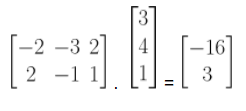

Similarly, the final output should be:  -16 * 1 + 3 * 5 + 1 * (-1) = -2

2. 

**ReLU:**

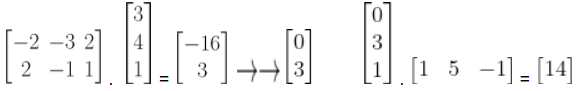


For the ReLu activation function, the final output will be 14.

**Sigmoid**

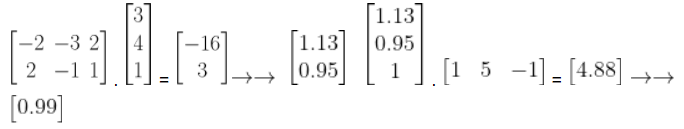

For the sigmoid activation function, the final output will be 0.99.

3. 
 
 For the first neuron on the hidden layer to the output layer, the new weight is 

= 0.4 - 0.1 * (0.917 - 0) * logistic(2 * 0.4 + 3 * 0.5 + 1 * 0.1) * (1-logistic(2 * 0.4 + 3 * 0.5 + 1 * 0.1)) * 2

= 0.386

## Q-6 (Bonus, coding assignment) 
Based on the data https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html, can you modify our scratch backpropagation implementation presented at class to perform prediction of this breast cancer dataset?  You can design your own feature engineering by utilizing any convenient python packages, however, you have to use your own backpropagation to train your model.  

Reference: [Neural Network](https://gist.github.com/chrisfosterelli/c353ce617a346bce2580dad8dc52e132)

In [ ]:
import numpy as np
import pandas as pd
from random import seed
from random import randrange
from random import random
from math import exp
from sklearn.datasets import load_breast_cancer 

cancer = load_breast_cancer()     
data = pd.DataFrame(cancer.data, columns=cancer.feature_names)
data['class'] = cancer.target
dataset = data.values.tolist()

In [ ]:
#normalization
# Find the min and max values for each column
def dataset_minmax(dataset):
	minmax = list()
	stats = [[min(column), max(column)] for column in zip(*dataset)]
	return stats
 
# Rescale dataset columns to the range 0-1
def normalize_dataset(dataset, minmax):
	for row in dataset:
		for i in range(len(row)-1):
			row[i] = (row[i] - minmax[i][0]) / (minmax[i][1] - minmax[i][0])

In [ ]:
# Split a dataset into k folds
def cross_validation_split(dataset, n_folds):
	dataset_split = list()
	dataset_copy = list(dataset)
	fold_size = int(len(dataset) / n_folds)
	for i in range(n_folds):
		fold = list()
		while len(fold) < fold_size:
			index = randrange(len(dataset_copy))
			fold.append(dataset_copy.pop(index))
		dataset_split.append(fold)
	return dataset_split

In [ ]:
# Calculate accuracy percentage
def accuracy_metric(actual, predicted):
	correct = 0
	for i in range(len(actual)):
		if actual[i] == predicted[i]:
			correct += 1
	return correct / float(len(actual)) * 100.0

In [ ]:
# Evaluate an algorithm using a cross validation split
def evaluate_algorithm(dataset, algorithm, n_folds, *args):
	folds = cross_validation_split(dataset, n_folds)
	scores = list()
	for fold in folds:
		train_set = list(folds)
		train_set.remove(fold)
		train_set = sum(train_set, [])
		test_set = list()
		for row in fold:
			row_copy = list(row)
			test_set.append(row_copy)
			row_copy[-1] = None
		predicted = algorithm(train_set, test_set, *args)
		actual = [row[-1] for row in fold]
		accuracy = accuracy_metric(actual, predicted)
		scores.append(accuracy)
	return scores

In [ ]:
# Calculate neuron activation for an input
def activate(weights, inputs):
	activation = weights[-1]
	for i in range(len(weights)-1):
		activation += weights[i] * inputs[i]
	return activation

In [ ]:
# Transfer neuron activation
def transfer(activation):
	return 1.0 / (1.0 + exp(-activation))
 
# Forward propagate input to a network output
def forward_propagate(network, row):
	inputs = row
	for layer in network:
		new_inputs = []
		for neuron in layer:
			activation = activate(neuron['weights'], inputs)
			neuron['output'] = transfer(activation)
			new_inputs.append(neuron['output'])
		inputs = new_inputs
	return inputs

In [ ]:
# Calculate the derivative of an neuron output
def transfer_derivative(output):
	return output * (1.0 - output)

In [ ]:
# Backpropagate error and store in neurons
def backward_propagate_error(network, expected):
	for i in reversed(range(len(network))):
		layer = network[i]
		errors = list()
		if i != len(network)-1:
			for j in range(len(layer)):
				error = 0.0
				for neuron in network[i + 1]:
					error += (neuron['weights'][j] * neuron['delta'])
				errors.append(error)
		else:
			for j in range(len(layer)):
				neuron = layer[j]
				errors.append(expected[j] - neuron['output'])
		for j in range(len(layer)):
			neuron = layer[j]
			neuron['delta'] = errors[j] * transfer_derivative(neuron['output'])

In [ ]:
# Update network weights with error
def update_weights(network, row, l_rate):
	for i in range(len(network)):
		inputs = row[:-1]
		if i != 0:
			inputs = [neuron['output'] for neuron in network[i - 1]]
		for neuron in network[i]:
			for j in range(len(inputs)):
				neuron['weights'][j] += l_rate * neuron['delta'] * inputs[j]
			neuron['weights'][-1] += l_rate * neuron['delta']

In [ ]:
# Train a network for a fixed number of epochs
def train_network(network, train, l_rate, n_epoch, n_outputs):
	for epoch in range(n_epoch):
		for row in train:
			outputs = forward_propagate(network, row)
			expected = ([0 for i in range(n_outputs)])
			expected[int(row[-1])] = 1.0
			backward_propagate_error(network, expected)
			update_weights(network, row, l_rate)

In [ ]:
# Initialize a network
def initialize_network(n_inputs, n_hidden, n_outputs):
	network = list()
	hidden_layer = [{'weights':[random() for i in range(n_inputs + 1)]} for i in range(n_hidden)]
	network.append(hidden_layer)
	output_layer = [{'weights':[random() for i in range(n_hidden + 1)]} for i in range(n_outputs)]
	network.append(output_layer)
	return network

In [ ]:
# Make a prediction with a network
def predict(network, row):
	outputs = forward_propagate(network, row)
	return outputs.index(max(outputs))

In [ ]:
# Backpropagation Algorithm With Stochastic Gradient Descent
def back_propagation(train, test, l_rate, n_epoch, n_hidden):
	n_inputs = len(train[0]) - 1
	n_outputs = len(set([row[-1] for row in train]))
	network = initialize_network(n_inputs, n_hidden, n_outputs)
	train_network(network, train, l_rate, n_epoch, n_outputs)
	predictions = list()
	for row in test:
		prediction = predict(network, row)
		predictions.append(prediction)
	return(predictions)

In [ ]:
# normalize input variables
minmax = dataset_minmax(dataset)
normalize_dataset(dataset, minmax)
# evaluate algorithm
n_folds = 50
l_rate = 1
n_epoch = 100
n_hidden = 4

In [ ]:
scores = evaluate_algorithm(dataset, back_propagation, n_folds, l_rate, n_epoch, n_hidden)

print('Scores: %s' % scores)
print('Mean Accuracy: %.3f%%' % np.mean(scores))

Scores: [100.0, 100.0, 100.0, 90.9090909090909, 90.9090909090909, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 90.9090909090909, 90.9090909090909, 100.0, 100.0, 100.0, 81.81818181818183, 90.9090909090909, 90.9090909090909, 100.0, 90.9090909090909, 100.0, 100.0, 90.9090909090909, 100.0, 100.0, 90.9090909090909, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 90.9090909090909, 100.0, 90.9090909090909, 100.0, 90.9090909090909, 100.0, 100.0, 100.0, 100.0]
Mean Accuracy: 97.455%
